In [1]:
import os
import re
import sys

import pathlib
from pathlib import Path

import pandas as pd
import numpy as np

import math

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
# A function used to define the thickness of x and y axis:
def style_ax(ax):
    for axis in ['top', 'bottom', 'left', 'right']:
        ax.spines[axis].set_linewidth(0.5)
        ax.tick_params(width=0.5)
    return ax

In [3]:
glazing_data = pd.ExcelFile(os.path.join('Data_GlazingPerformance.xlsx'))

In [4]:
glazing_data

In [5]:
print("glazing_data, sheet names = \n {}\n".format(glazing_data.sheet_names))

glazing_data, sheet names = 
 ['Cataglogues', 'BEM', '2-40 mm', 'Sheet1']



In [6]:
# Create a DataFrame:
glazing_Cat = glazing_data.parse('2-40 mm').drop(labels="Comments", axis=1)

In [7]:
glazing_Cat

,Brand,Composition,Infill Gas,Type,Sheets,Ug,SHGC,LT
0,AGC,3-6-3,Air,-,2,3.3,0.81,83.0
1,AGC,44.1-6-33.1,Air,-,2,3.2,0.69,79.0
2,AGC,5-8-5,Air,-,2,3.1,0.48,36.0
3,AGC,44.6-6-44.2,Air,-,2,3.0,0.67,79.0
4,AGC,6-8-6,Air,-,2,3.0,0.77,81.0
...,...,...,...,...,...,...,...,...
1060,AGC,33.2-14-4-14-33.2,Argon,NaN,3,0.6,0.48,73.0
1061,AGC,33.2-14-4-14-33.2,Argon,NaN,3,0.6,0.48,74.0
1062,AGC,33.2-16-4-16-33.2,Argon,NaN,3,0.6,0.48,73.0
1063,AGC,33.2-16-4-16-44.2,Argon,NaN,3,0.6,0.48,72.0


In [8]:
glazing_Cat['LT'] = glazing_Cat['LT']/100

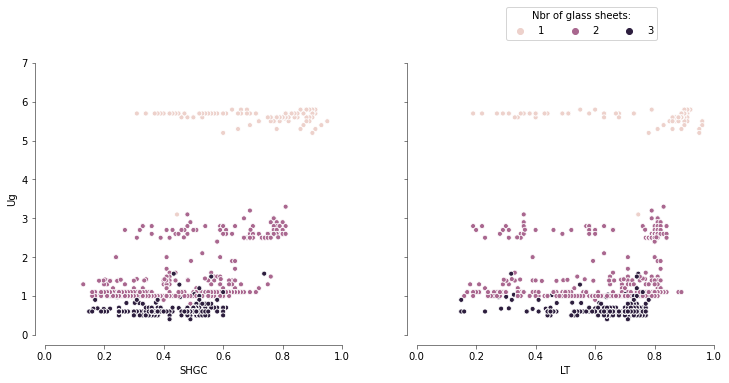

In [9]:
# Plot SHGC v. Ug and LT v. Ug:
fig, axes = plt.subplots(nrows=1, ncols=2,
                         sharex=True, sharey=True,
                         figsize=(12, 5))

for col, data in enumerate(['SHGC', 'LT']):
    ax = axes[col]
    sns.scatterplot(data=glazing_Cat,
                    x=f"{data}", y="Ug",
                    hue='Sheets',
                    marker='.', s=100,
                    ax=ax)
    style_ax(ax)
    ax.get_legend().remove()

# Add legend:
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', ncol=4,
           title='Nbr of glass sheets:',
           bbox_to_anchor=(0.84, 1.05))

ax.set_ylim(0, 7)
plt.yticks(np.arange(0, 8, 1))
ax.set_xlim(0, 1)
plt.xticks(np.arange(0, 1.1, 0.2))

fig.subplots_adjust(wspace=0.25)

sns.despine(offset=10)
plt.show()

In [10]:
# Create a DataFrame:
glazing_BEM = glazing_data.parse('BEM')

In [11]:
glazing_BEM

,Brand,Composition,Infill Gas,Type,Sheets,Ug,SHGC,LT,Comments
0,AGC,SG55.2,-,clear,1,5.570,0.808,87.9,Stratobel Clearlite
1,AGC,SG|55.2,-,clear,1,3.099,0.445,74.5,Stratobel iplus Top 1.0
2,AGC,8-10-55.2,air,tinted,2,2.706,0.464,36.4,Planibel Bronze
3,AGC,8-10-55.2,air,clear,2,2.706,0.692,76.8,Clear
4,AGC,8|-18Arg-55.2,NaN,solar control and low-e,2,1.903,0.492,59.3,Sunergy Clear
5,AGC,8|-18Arg-55.2,NaN,solar control and low-e,2,1.450,0.539,76.0,Planible top Nplus
6,AGC,8-18Arg-|55.2,NaN,solar control and low-e,2,1.435,0.592,76.8,Clearvision
7,AGC,8|-18Arg-55.2,NaN,solar control and low-e,2,1.430,0.341,69.6,Stopray Vision-72
8,AGC,8|-18Arg-55.2,NaN,solar control and low-e,2,1.405,0.248,49.3,Stopray Vision-51T
9,AGC,8|-18Arg-|55.2,NaN,solar control and low-e,2,1.393,0.183,30.2,Stopray Vision-36T


In [12]:
glazing_BEM['LT'] = glazing_BEM['LT']/100

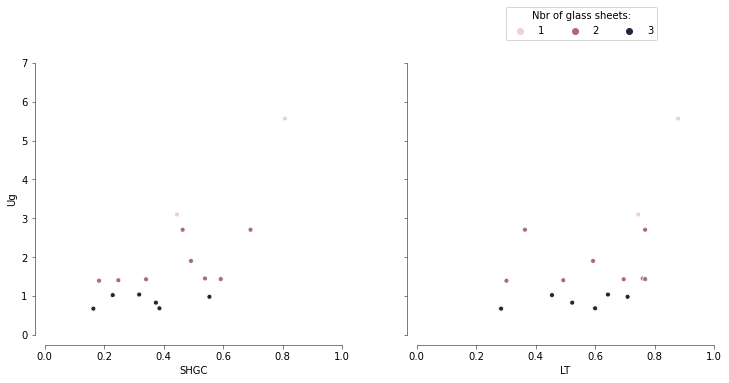

In [13]:
# Plot SHGC v. Ug and LT v. Ug:
fig, axes = plt.subplots(nrows=1, ncols=2,
                         sharex=True, sharey=True,
                         figsize=(12, 5))

for col, data in enumerate(['SHGC', 'LT']):
    ax = axes[col]
    sns.scatterplot(data=glazing_BEM,
                    x=f"{data}", y="Ug",
                    hue='Sheets',
                    marker='.', s=100,
                    ax=ax)
    style_ax(ax)
    ax.get_legend().remove()

# Add legend:
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', ncol=4,
           title='Nbr of glass sheets:',
           bbox_to_anchor=(0.84, 1.05))

ax.set_ylim(0, 7)
plt.yticks(np.arange(0, 8, 1))
ax.set_xlim(0, 1)
plt.xticks(np.arange(0, 1.1, 0.2))

fig.subplots_adjust(wspace=0.25)

sns.despine(offset=10)
plt.show()